In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle


In [2]:
df = pd.read_csv("smartchat_sentiment_3000.csv")
df.head()


,text,label
0,daha fragmanından filme gitmemem gerektigini ...,Negative
1,bu kadar kötü beklemiyodum.tamam çok iyi de b...,Negative
2,cocuklar ıcın ıyı bır seyırlık!!!bu sonlar sı...,Negative
3,hayatımda izlediğim en iğrenç filmlerden biri...,Negative
4,cannes dan ödül almasına şaşırdım gerçekten d...,Negative


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], 
    df["label"], 
    test_size=0.2, 
    random_state=42, 
    stratify=df["label"]   # sınıfları dengede tutmak için
)


TF-IDF Dönüşümü (Metni Sayıya Çevirme)

Makine öğrenmesi algoritmaları metni direkt anlayamaz, sayısal forma çevrilmesi gerekir.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,      # 5000 en ideal başlangıç
    ngram_range=(1, 2)      # unigram + bigram (çok önemli)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Logistic Regression Modelini Eğit

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [6]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8433333333333334
              precision    recall  f1-score   support

    Negative       0.81      0.81      0.81       200
        Notr       0.86      0.93      0.89       200
    Positive       0.87      0.79      0.83       200

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



NAIVE BAYES EĞİTİMİ

In [7]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [8]:
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8133333333333334
              precision    recall  f1-score   support

    Negative       0.73      0.85      0.79       200
        Notr       0.96      0.77      0.85       200
    Positive       0.79      0.82      0.81       200

    accuracy                           0.81       600
   macro avg       0.83      0.81      0.82       600
weighted avg       0.83      0.81      0.82       600



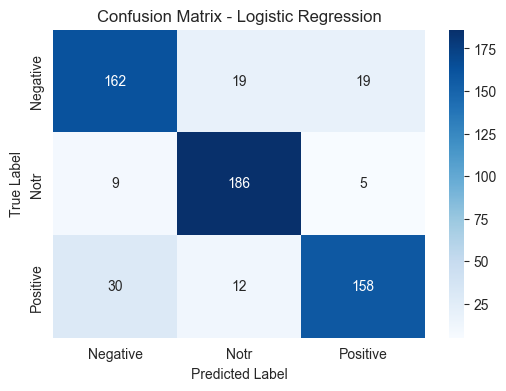

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_lr)

# Sınıf isimleri sırasıyla:
labels = ["Negative", "Notr", "Positive"]

# Heatmap çiz
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [10]:
import random

print("RANDOM TEST SAMPLES".center(60, "-"))

for i in range(10):
    idx = random.randint(0, len(X_test) - 1)
    text = X_test.iloc[idx]
    actual = y_test.iloc[idx]
    
    # TF-IDF ile vectorize edip tahmin yapıyoruz
    pred = lr.predict(tfidf.transform([text]))[0]
    
    print(f"\n📝 Text: {text}")
    print(f"🎯 Actual Label: {actual}")
    print(f"🤖 Predicted: {pred}")
    print("-" * 60)


--------------------RANDOM TEST SAMPLES---------------------

📝 Text: Bu iki ismin gruba katılması bekleniyordu .
🎯 Actual Label: Notr
🤖 Predicted: Notr
------------------------------------------------------------

📝 Text: Saç çizgisi alın ortalarına dek iner .
🎯 Actual Label: Notr
🤖 Predicted: Notr
------------------------------------------------------------

📝 Text: Modern operasyonel amplifikatörler genellikle toplu devrelerde bulunurlar .
🎯 Actual Label: Notr
🤖 Predicted: Notr
------------------------------------------------------------

📝 Text: beklentinin üstünde bu fiyata bence mükemmel...
🎯 Actual Label: Positive
🤖 Predicted: Positive
------------------------------------------------------------

📝 Text: koku hakikaten cok mükemmel ilk de odunsu koku hakim gbi gelrken sonradan yumuşak çiçeksi bi koku  oluşyo arkadslarım da cok beğendi herkes bu koku nedir dye sordular herkese tavsiye ediyorum.en iyiside fiyatı da uygundu teşekkürler hepsi buarada
🎯 Actual Label: Positive
🤖 Predi

In [21]:
def test_single_text(text):
    # TF-IDF ile dönüştür
    vectorized = tfidf.transform([text])
    
    # Modelden tahmin al
    pred = lr.predict(vectorized)[0]
    
    # Güven skoru (Logistic Regression probability)
    prob = lr.predict_proba(vectorized).max()
    
    print("Text:", text)
    print(" Prediction:", pred)
    print(f" Confidence: {prob:.2f}")

# ÖRNEK KULLANIM:
test_single_text("Gerçekten hiçbir şey yolunda gitmiyor bugün.")
test_single_text("Fena değildi ama daha iyi olabilirdi.")
test_single_text("Ürün elime çok hızlı ulaştı, teşekkür ederim.")
test_single_text("Bu ne ya hiç beğenmedim.")
test_single_text("Yarın saat 3'te görüşürüz.")



Text: Gerçekten hiçbir şey yolunda gitmiyor bugün.
 Prediction: Negative
 Confidence: 0.37
Text: Fena değildi ama daha iyi olabilirdi.
 Prediction: Negative
 Confidence: 0.68
Text: Ürün elime çok hızlı ulaştı, teşekkür ederim.
 Prediction: Positive
 Confidence: 0.94
Text: Bu ne ya hiç beğenmedim.
 Prediction: Negative
 Confidence: 0.80
Text: Yarın saat 3'te görüşürüz.
 Prediction: Notr
 Confidence: 0.39


In [23]:
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(lr, f)
